In [88]:
import glob
json_dir = glob.glob("D:\\fire_datasets\\Training\\sample\\*.json")
print(len(json_dir))


2000


In [89]:
import json

with open(json_dir[0], "r", encoding = "UTF-8") as f:
    json_data = json.load(f)

x,y = json_data['image']['resolution']

In [90]:
json_dir

['D:\\fire_datasets\\Training\\sample\\S3-N1448MF01859.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01862.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01872.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01884.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01926.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01954.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01975.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01977.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01988.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF02004.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF02013.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF02071.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1451MF00128.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1451MF00172.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1451MF00176.json',
 'D:\\fire_datasets\\Training\\sample\\S3-N1451MF00180.json',
 'D:\\fi

In [91]:
for i in json_data["annotations"]:
    i = i['class']
    i = int(i)
    print(i)
    

1
4


In [92]:
json_data

{'image': {'date': '20201124',
  'path': 'fire/Train/image',
  'filename': 'S3-N1448MF01859.jpg',
  'copyrighter': '미디어그룹사람과숲(컨)',
  'H_DPI': 96,
  'location': '14',
  'V_DPI': 96,
  'bit': 24,
  'resolution': [1920, 1080]},
 'annotations': [{'data ID': 'S3',
   'middle classification': '01',
   'flags': 'not occluded, not truncated',
   'box': [763, 658, 1072, 919],
   'class': '01'},
  {'data ID': 'S3',
   'middle classification': '01',
   'flags': 'not occluded, not truncated',
   'box': [897, 919, 1122, 1042],
   'class': '04'}]}

In [93]:
for i in json_data["annotations"]:
    print(i['box'])

[763, 658, 1072, 919]
[897, 919, 1122, 1042]


In [94]:
json_data['image']['filename'][:-4]

'S3-N1448MF01859'

In [95]:
# yolo txt파일 만들기
txt_dir = []
for i in json_dir:
    txt_dir.append("D:\\fire_datasets\\Training\\labels\\" + i[-20:-5] + ".txt")


In [96]:
txt_dir

['D:\\fire_datasets\\Training\\labels\\S3-N1448MF01859.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01862.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01872.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01884.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01926.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01954.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01975.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01977.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01988.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF02004.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF02013.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF02071.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1451MF00128.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1451MF00172.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1451MF00176.txt',
 'D:\\fire_datasets\\Training\\labels\\S3-N1451MF00180.txt',
 'D:\\fire_datasets\\Tra

In [97]:
txt_dir[0][-19:]

'S3-N1448MF01859.txt'

In [98]:
# box Yolo 형식으로 변환
def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return(x,y,w,h)

In [99]:
# polygon형식 box로 변환
def polygon_Box(polygon):
    x_array = []
    y_array = []
    for i in polygon:
        x, y = i
        x_array.append(int(x))
        y_array.append(int(y))
    xmin = min(x_array)
    xmax = max(x_array)
    ymin = min(y_array)
    ymax = max(y_array)
    
    box = (xmin, ymin, xmax, ymax)
    return box

In [100]:
def json2txt(json_dir, txt_path):
    with open(json_dir, "r", encoding="utf-8-sig") as f:
        json_data = json.load(f)
        json.dumps(json_data, indent="\t", ensure_ascii=False)
        #print("{}".format(json_data), "완료\n")
        
    rsoltn = json_data["image"]["resolution"]
    size = (int(rsoltn[0]), int(rsoltn[1]))
    #print("size : ",size, "\n")
    
    for i in json_data["annotations"]:
        if 'box' in i:
            box = i['box']
            break;
        if "polygon" in i:
            box = polygon_Box(i["polygon"])
            break;
        #print("Box : ", box, "\n")
    
    conv_box = convert(size, box)
    #print("변형된 박스 : ", conv_box, "\n")
    
    for i in json_data["annotations"]:
        class_num = i['class']
        class_num = int(class_num) - 1
        if class_num == 10:
            class_num -= 1 
            
        #print("클래스 넘버 : ", class_num, "\n")
    
    row = str(class_num) +" "+str(conv_box[0])+" "+str(conv_box[1])+" "+str(conv_box[2])+" "+str(conv_box[3])
        
    with open(txt_path, "w") as f:
        f.write("\n".join([row])+"\n")

In [101]:
from glob import glob
import json

In [102]:
path = "D:\\fire_datasets\\Training\\sample\\"
txt_path = "D:\\fire_datasets\\Training\\labels\\"
json_dir = glob(path + "*.json")

print(json_dir[0:5])
print(txt_dir[0:5])

['D:\\fire_datasets\\Training\\sample\\S3-N1448MF01859.json', 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01862.json', 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01872.json', 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01884.json', 'D:\\fire_datasets\\Training\\sample\\S3-N1448MF01926.json']
['D:\\fire_datasets\\Training\\labels\\S3-N1448MF01859.txt', 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01862.txt', 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01872.txt', 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01884.txt', 'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01926.txt']


In [103]:
json2txt(json_dir[0], txt_dir[0])

In [104]:
txt_dir[0]

'D:\\fire_datasets\\Training\\labels\\S3-N1448MF01859.txt'

In [105]:
# 결과확인
import cv2
import matplotlib.pyplot as plt
sample_img = "D:\\fire_datasets\\Training\\sample\\S3-N1448MF01859.jpg"
sample_label = "D:\\fire_datasets\\Training\\labels\\S3-N1448MF01859.txt"

In [106]:
img = cv2.imread(sample_img)
dh, dw, _ = img.shape

In [107]:
f1 = open(sample_label, "r")
label = f1.readlines()
f1.close()

762 1072 658 919


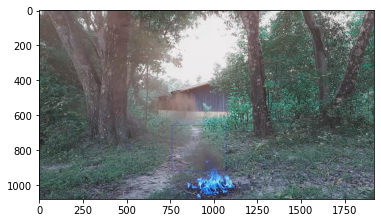

In [108]:
x, y, w, h = map(float, label[0].split(" ")[1:])

l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)

if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1

print(l, r, t, b)
cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
plt.imshow(img)
plt.show()

In [109]:
def image_Box(img, bbox):
  x = bbox[0]
  y = bbox[1]
  w = bbox[2]
  h = bbox[3]
  plt.imshow(img)
  cv2.rectangle(img, (x, y), (w, h), (255,0,0), 2)
  plt.show()

In [110]:
print(json_dir[0])
print(txt_dir[0])

D:\fire_datasets\Training\sample\S3-N1448MF01859.json
D:\fire_datasets\Training\labels\S3-N1448MF01859.txt


# Train txt 파일 생성하기

In [111]:
for i in range(len(json_dir)):
    json2txt(json_dir[i], txt_dir[i])
    print("{}".format(i), "번째", "파일: ",txt_dir[i][-19:], "생성 되었습니다.")

0 번째 파일:  S3-N1448MF01859.txt 생성 되었습니다.
1 번째 파일:  S3-N1448MF01862.txt 생성 되었습니다.
2 번째 파일:  S3-N1448MF01872.txt 생성 되었습니다.
3 번째 파일:  S3-N1448MF01884.txt 생성 되었습니다.
4 번째 파일:  S3-N1448MF01926.txt 생성 되었습니다.
5 번째 파일:  S3-N1448MF01954.txt 생성 되었습니다.
6 번째 파일:  S3-N1448MF01975.txt 생성 되었습니다.
7 번째 파일:  S3-N1448MF01977.txt 생성 되었습니다.
8 번째 파일:  S3-N1448MF01988.txt 생성 되었습니다.
9 번째 파일:  S3-N1448MF02004.txt 생성 되었습니다.
10 번째 파일:  S3-N1448MF02013.txt 생성 되었습니다.
11 번째 파일:  S3-N1448MF02071.txt 생성 되었습니다.
12 번째 파일:  S3-N1451MF00128.txt 생성 되었습니다.
13 번째 파일:  S3-N1451MF00172.txt 생성 되었습니다.
14 번째 파일:  S3-N1451MF00176.txt 생성 되었습니다.
15 번째 파일:  S3-N1451MF00180.txt 생성 되었습니다.
16 번째 파일:  S3-N1451MF00186.txt 생성 되었습니다.
17 번째 파일:  S3-N1451MF00190.txt 생성 되었습니다.
18 번째 파일:  S3-N1451MF00192.txt 생성 되었습니다.
19 번째 파일:  S3-N1451MF00194.txt 생성 되었습니다.
20 번째 파일:  S3-N1451MF00196.txt 생성 되었습니다.
21 번째 파일:  S3-N1451MF00198.txt 생성 되었습니다.
22 번째 파일:  S3-N1451MF00217.txt 생성 되었습니다.
23 번째 파일:  S3-N1451MF00231.txt 생성 되었습니다.
24 번째 파일:  S3-N1451MF00297

249 번째 파일:  S3-N1452MF01376.txt 생성 되었습니다.
250 번째 파일:  S3-N1452MF01387.txt 생성 되었습니다.
251 번째 파일:  S3-N1452MF01431.txt 생성 되었습니다.
252 번째 파일:  S3-N1452MF01434.txt 생성 되었습니다.
253 번째 파일:  S3-N1452MF01438.txt 생성 되었습니다.
254 번째 파일:  S3-N1452MF01461.txt 생성 되었습니다.
255 번째 파일:  S3-N1452MF01465.txt 생성 되었습니다.
256 번째 파일:  S3-N1452MF01481.txt 생성 되었습니다.
257 번째 파일:  S3-N1452MF01500.txt 생성 되었습니다.
258 번째 파일:  S3-N1452MF01512.txt 생성 되었습니다.
259 번째 파일:  S3-N1452MF01526.txt 생성 되었습니다.
260 번째 파일:  S3-N1452MF01530.txt 생성 되었습니다.
261 번째 파일:  S3-N1452MF01537.txt 생성 되었습니다.
262 번째 파일:  S3-N1452MF01551.txt 생성 되었습니다.
263 번째 파일:  S3-N1452MF01554.txt 생성 되었습니다.
264 번째 파일:  S3-N1452MF01621.txt 생성 되었습니다.
265 번째 파일:  S3-N1452MF01691.txt 생성 되었습니다.
266 번째 파일:  S3-N1452MF01713.txt 생성 되었습니다.
267 번째 파일:  S3-N1452MF01718.txt 생성 되었습니다.
268 번째 파일:  S3-N1452MF01729.txt 생성 되었습니다.
269 번째 파일:  S3-N1452MF01736.txt 생성 되었습니다.
270 번째 파일:  S3-N1452MF01766.txt 생성 되었습니다.
271 번째 파일:  S3-N1452MF01767.txt 생성 되었습니다.
272 번째 파일:  S3-N1452MF01793.txt 생성

453 번째 파일:  S3-N1454MF00503.txt 생성 되었습니다.
454 번째 파일:  S3-N1454MF00512.txt 생성 되었습니다.
455 번째 파일:  S3-N1454MF00519.txt 생성 되었습니다.
456 번째 파일:  S3-N1454MF00545.txt 생성 되었습니다.
457 번째 파일:  S3-N1454MF00551.txt 생성 되었습니다.
458 번째 파일:  S3-N1454MF00552.txt 생성 되었습니다.
459 번째 파일:  S3-N1454MF00554.txt 생성 되었습니다.
460 번째 파일:  S3-N1454MF00564.txt 생성 되었습니다.
461 번째 파일:  S3-N1454MF00574.txt 생성 되었습니다.
462 번째 파일:  S3-N1454MF00575.txt 생성 되었습니다.
463 번째 파일:  S3-N1454MF00657.txt 생성 되었습니다.
464 번째 파일:  S3-N1454MF00706.txt 생성 되었습니다.
465 번째 파일:  S3-N1454MF00749.txt 생성 되었습니다.
466 번째 파일:  S3-N1454MF00758.txt 생성 되었습니다.
467 번째 파일:  S3-N1454MF00761.txt 생성 되었습니다.
468 번째 파일:  S3-N1454MF00763.txt 생성 되었습니다.
469 번째 파일:  S3-N1454MF00770.txt 생성 되었습니다.
470 번째 파일:  S3-N1454MF00786.txt 생성 되었습니다.
471 번째 파일:  S3-N1454MF00801.txt 생성 되었습니다.
472 번째 파일:  S3-N1454MF00809.txt 생성 되었습니다.
473 번째 파일:  S3-N1454MF00816.txt 생성 되었습니다.
474 번째 파일:  S3-N1454MF00820.txt 생성 되었습니다.
475 번째 파일:  S3-N1454MF00839.txt 생성 되었습니다.
476 번째 파일:  S3-N1454MF00843.txt 생성

648 번째 파일:  S3-N1455MF01115.txt 생성 되었습니다.
649 번째 파일:  S3-N1455MF01116.txt 생성 되었습니다.
650 번째 파일:  S3-N1455MF01141.txt 생성 되었습니다.
651 번째 파일:  S3-N1455MF01151.txt 생성 되었습니다.
652 번째 파일:  S3-N1455MF01153.txt 생성 되었습니다.
653 번째 파일:  S3-N1455MF01158.txt 생성 되었습니다.
654 번째 파일:  S3-N1455MF01159.txt 생성 되었습니다.
655 번째 파일:  S3-N1455MF01179.txt 생성 되었습니다.
656 번째 파일:  S3-N1455MF01194.txt 생성 되었습니다.
657 번째 파일:  S3-N1455MF01199.txt 생성 되었습니다.
658 번째 파일:  S3-N1455MF01221.txt 생성 되었습니다.
659 번째 파일:  S3-N1455MF01222.txt 생성 되었습니다.
660 번째 파일:  S3-N1455MF01227.txt 생성 되었습니다.
661 번째 파일:  S3-N1455MF01239.txt 생성 되었습니다.
662 번째 파일:  S3-N1455MF01256.txt 생성 되었습니다.
663 번째 파일:  S3-N1455MF01274.txt 생성 되었습니다.
664 번째 파일:  S3-N1455MF01279.txt 생성 되었습니다.
665 번째 파일:  S3-N1455MF01306.txt 생성 되었습니다.
666 번째 파일:  S3-N1455MF01330.txt 생성 되었습니다.
667 번째 파일:  S3-N1455MF01338.txt 생성 되었습니다.
668 번째 파일:  S3-N1455MF01348.txt 생성 되었습니다.
669 번째 파일:  S3-N1455MF01361.txt 생성 되었습니다.
670 번째 파일:  S3-N1455MF01378.txt 생성 되었습니다.
671 번째 파일:  S3-N1455MF01383.txt 생성

888 번째 파일:  S3-N1457MF00217.txt 생성 되었습니다.
889 번째 파일:  S3-N1457MF00234.txt 생성 되었습니다.
890 번째 파일:  S3-N1457MF00244.txt 생성 되었습니다.
891 번째 파일:  S3-N1457MF00277.txt 생성 되었습니다.
892 번째 파일:  S3-N1457MF00287.txt 생성 되었습니다.
893 번째 파일:  S3-N1457MF00289.txt 생성 되었습니다.
894 번째 파일:  S3-N1457MF00296.txt 생성 되었습니다.
895 번째 파일:  S3-N1457MF00318.txt 생성 되었습니다.
896 번째 파일:  S3-N1457MF00343.txt 생성 되었습니다.
897 번째 파일:  S3-N1457MF00353.txt 생성 되었습니다.
898 번째 파일:  S3-N1457MF00374.txt 생성 되었습니다.
899 번째 파일:  S3-N1457MF00376.txt 생성 되었습니다.
900 번째 파일:  S3-N1457MF00379.txt 생성 되었습니다.
901 번째 파일:  S3-N1457MF00380.txt 생성 되었습니다.
902 번째 파일:  S3-N1457MF00396.txt 생성 되었습니다.
903 번째 파일:  S3-N1457MF00420.txt 생성 되었습니다.
904 번째 파일:  S3-N1457MF00425.txt 생성 되었습니다.
905 번째 파일:  S3-N1457MF00440.txt 생성 되었습니다.
906 번째 파일:  S3-N1457MF00453.txt 생성 되었습니다.
907 번째 파일:  S3-N1457MF00481.txt 생성 되었습니다.
908 번째 파일:  S3-N1457MF00484.txt 생성 되었습니다.
909 번째 파일:  S3-N1457MF00493.txt 생성 되었습니다.
910 번째 파일:  S3-N1457MF00497.txt 생성 되었습니다.
911 번째 파일:  S3-N1457MF00551.txt 생성

1275 번째 파일:  S3-N1763MN00009.txt 생성 되었습니다.
1276 번째 파일:  S3-N1763MN00029.txt 생성 되었습니다.
1277 번째 파일:  S3-N1763MN00046.txt 생성 되었습니다.
1278 번째 파일:  S3-N1763MN00198.txt 생성 되었습니다.
1279 번째 파일:  S3-N1763MN00216.txt 생성 되었습니다.
1280 번째 파일:  S3-N1763MN00218.txt 생성 되었습니다.
1281 번째 파일:  S3-N1763MN00243.txt 생성 되었습니다.
1282 번째 파일:  S3-N1763MN00339.txt 생성 되었습니다.
1283 번째 파일:  S3-N1763MN00393.txt 생성 되었습니다.
1284 번째 파일:  S3-N1763MN00405.txt 생성 되었습니다.
1285 번째 파일:  S3-N1763MN00453.txt 생성 되었습니다.
1286 번째 파일:  S3-N1763MN00545.txt 생성 되었습니다.
1287 번째 파일:  S3-N1763MN00574.txt 생성 되었습니다.
1288 번째 파일:  S3-N1763MN00631.txt 생성 되었습니다.
1289 번째 파일:  S3-N1763MN00643.txt 생성 되었습니다.
1290 번째 파일:  S3-N1763MN00696.txt 생성 되었습니다.
1291 번째 파일:  S3-N1763MN00785.txt 생성 되었습니다.
1292 번째 파일:  S3-N1763MN00834.txt 생성 되었습니다.
1293 번째 파일:  S3-N1763MN00905.txt 생성 되었습니다.
1294 번째 파일:  S3-N1763MN00906.txt 생성 되었습니다.
1295 번째 파일:  S3-N1763MN00969.txt 생성 되었습니다.
1296 번째 파일:  S3-N1763MN00983.txt 생성 되었습니다.
1297 번째 파일:  S3-N1763MN01038.txt 생성 되었습니다.
1298 번째 파일:

1497 번째 파일:  S3-N1771MN01528.txt 생성 되었습니다.
1498 번째 파일:  S3-N1771MN01570.txt 생성 되었습니다.
1499 번째 파일:  S3-N1771MN01576.txt 생성 되었습니다.
1500 번째 파일:  S3-N1771MN01579.txt 생성 되었습니다.
1501 번째 파일:  S3-N1771MN01583.txt 생성 되었습니다.
1502 번째 파일:  S3-N1771MN01596.txt 생성 되었습니다.
1503 번째 파일:  S3-N1771MN01678.txt 생성 되었습니다.
1504 번째 파일:  S3-N1771MN01681.txt 생성 되었습니다.
1505 번째 파일:  S3-N1771MN01723.txt 생성 되었습니다.
1506 번째 파일:  S3-N1771MN01753.txt 생성 되었습니다.
1507 번째 파일:  S3-N1771MN01795.txt 생성 되었습니다.
1508 번째 파일:  S3-N1771MN01799.txt 생성 되었습니다.
1509 번째 파일:  S3-N1771MN01990.txt 생성 되었습니다.
1510 번째 파일:  S3-N1771MN02009.txt 생성 되었습니다.
1511 번째 파일:  S3-N1771MN02022.txt 생성 되었습니다.
1512 번째 파일:  S3-N1771MN02080.txt 생성 되었습니다.
1513 번째 파일:  S3-N1771MN02081.txt 생성 되었습니다.
1514 번째 파일:  S3-N1772MN00031.txt 생성 되었습니다.
1515 번째 파일:  S3-N1772MN00053.txt 생성 되었습니다.
1516 번째 파일:  S3-N1772MN00059.txt 생성 되었습니다.
1517 번째 파일:  S3-N1772MN00070.txt 생성 되었습니다.
1518 번째 파일:  S3-N1772MN00083.txt 생성 되었습니다.
1519 번째 파일:  S3-N1772MN00160.txt 생성 되었습니다.
1520 번째 파일:

1754 번째 파일:  S3-N1787MN00604.txt 생성 되었습니다.
1755 번째 파일:  S3-N1787MN00623.txt 생성 되었습니다.
1756 번째 파일:  S3-N1787MN00700.txt 생성 되었습니다.
1757 번째 파일:  S3-N1787MN00747.txt 생성 되었습니다.
1758 번째 파일:  S3-N1787MN00763.txt 생성 되었습니다.
1759 번째 파일:  S3-N1787MN00787.txt 생성 되었습니다.
1760 번째 파일:  S3-N1787MN00919.txt 생성 되었습니다.
1761 번째 파일:  S3-N1787MN00929.txt 생성 되었습니다.
1762 번째 파일:  S3-N1787MN00930.txt 생성 되었습니다.
1763 번째 파일:  S3-N1787MN00960.txt 생성 되었습니다.
1764 번째 파일:  S3-N1787MN00975.txt 생성 되었습니다.
1765 번째 파일:  S3-N1787MN00979.txt 생성 되었습니다.
1766 번째 파일:  S3-N1787MN00985.txt 생성 되었습니다.
1767 번째 파일:  S3-N1787MN00989.txt 생성 되었습니다.
1768 번째 파일:  S3-N1787MN01007.txt 생성 되었습니다.
1769 번째 파일:  S3-N1787MN01015.txt 생성 되었습니다.
1770 번째 파일:  S3-N1787MN01030.txt 생성 되었습니다.
1771 번째 파일:  S3-N1787MN01039.txt 생성 되었습니다.
1772 번째 파일:  S3-N1787MN01165.txt 생성 되었습니다.
1773 번째 파일:  S3-N1787MN01227.txt 생성 되었습니다.
1774 번째 파일:  S3-N1787MN01230.txt 생성 되었습니다.
1775 번째 파일:  S3-N1787MN01241.txt 생성 되었습니다.
1776 번째 파일:  S3-N1787MN01267.txt 생성 되었습니다.
1777 번째 파일:

# Validation txt 파일 생성하기

In [112]:
path = "D:\\fire_datasets\\Validation\\sample\\"
txt_path = "D:\\fire_datasets\\Validation\\labels\\"
json_dir = glob(path + "*.json")

print(json_dir[0:5])

['D:\\fire_datasets\\Validation\\sample\\S3-N0801MN04586.json', 'D:\\fire_datasets\\Validation\\sample\\S3-N0801MN04591.json', 'D:\\fire_datasets\\Validation\\sample\\S3-N0801MN04641.json', 'D:\\fire_datasets\\Validation\\sample\\S3-N0801MN04761.json', 'D:\\fire_datasets\\Validation\\sample\\S3-N0801MN05066.json']


In [113]:
# yolo txt파일 만들기
val_txt_dir = []
for i in json_dir:
    val_txt_dir.append("D:\\fire_datasets\\Validation\\labels\\" + i[-20:-5] + ".txt")


In [114]:
print(val_txt_dir[0:5])

['D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04586.txt', 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04591.txt', 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04641.txt', 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04761.txt', 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05066.txt']


In [115]:
for i in range(len(json_dir)):
    json2txt(json_dir[i], val_txt_dir[i])
    print("{}".format(i), "번째", "파일: ",val_txt_dir[i][-19:], "생성 되었습니다.")

0 번째 파일:  S3-N0801MN04586.txt 생성 되었습니다.
1 번째 파일:  S3-N0801MN04591.txt 생성 되었습니다.
2 번째 파일:  S3-N0801MN04641.txt 생성 되었습니다.
3 번째 파일:  S3-N0801MN04761.txt 생성 되었습니다.
4 번째 파일:  S3-N0801MN05066.txt 생성 되었습니다.
5 번째 파일:  S3-N0801MN05122.txt 생성 되었습니다.
6 번째 파일:  S3-N0801MN05163.txt 생성 되었습니다.
7 번째 파일:  S3-N0801MN05167.txt 생성 되었습니다.
8 번째 파일:  S3-N0801MN05190.txt 생성 되었습니다.
9 번째 파일:  S3-N0802MN00827.txt 생성 되었습니다.
10 번째 파일:  S3-N0802MN00944.txt 생성 되었습니다.
11 번째 파일:  S3-N0802MN00984.txt 생성 되었습니다.
12 번째 파일:  S3-N0802MN01008.txt 생성 되었습니다.
13 번째 파일:  S3-N0802MN01024.txt 생성 되었습니다.
14 번째 파일:  S3-N0802MN01036.txt 생성 되었습니다.
15 번째 파일:  S3-N0802MN01043.txt 생성 되었습니다.
16 번째 파일:  S3-N0802MN01044.txt 생성 되었습니다.
17 번째 파일:  S3-N0802MN01048.txt 생성 되었습니다.
18 번째 파일:  S3-N0802MN01059.txt 생성 되었습니다.
19 번째 파일:  S3-N0802MN01097.txt 생성 되었습니다.
20 번째 파일:  S3-N0802MN01126.txt 생성 되었습니다.
21 번째 파일:  S3-N0802MN01258.txt 생성 되었습니다.
22 번째 파일:  S3-N0802MN01320.txt 생성 되었습니다.
23 번째 파일:  S3-N0802MN01346.txt 생성 되었습니다.
24 번째 파일:  S3-N0802MN01353

257 번째 파일:  S3-N1016MN00540.txt 생성 되었습니다.
258 번째 파일:  S3-N1016MN00562.txt 생성 되었습니다.
259 번째 파일:  S3-N1016MN00563.txt 생성 되었습니다.
260 번째 파일:  S3-N1016MN00598.txt 생성 되었습니다.
261 번째 파일:  S3-N1016MN00661.txt 생성 되었습니다.
262 번째 파일:  S3-N1016MN00701.txt 생성 되었습니다.
263 번째 파일:  S3-N1016MN00748.txt 생성 되었습니다.
264 번째 파일:  S3-N1016MN00763.txt 생성 되었습니다.
265 번째 파일:  S3-N1016MN00769.txt 생성 되었습니다.
266 번째 파일:  S3-N1016MN00781.txt 생성 되었습니다.
267 번째 파일:  S3-N1016MN00797.txt 생성 되었습니다.
268 번째 파일:  S3-N1016MN00821.txt 생성 되었습니다.
269 번째 파일:  S3-N1016MN00838.txt 생성 되었습니다.
270 번째 파일:  S3-N1016MN00857.txt 생성 되었습니다.
271 번째 파일:  S3-N1016MN00865.txt 생성 되었습니다.
272 번째 파일:  S3-N1016MN00928.txt 생성 되었습니다.
273 번째 파일:  S3-N1016MN00934.txt 생성 되었습니다.
274 번째 파일:  S3-N1016MN00974.txt 생성 되었습니다.
275 번째 파일:  S3-N1016MN00990.txt 생성 되었습니다.
276 번째 파일:  S3-N1022MN00017.txt 생성 되었습니다.
277 번째 파일:  S3-N1022MN00018.txt 생성 되었습니다.
278 번째 파일:  S3-N1022MN00033.txt 생성 되었습니다.
279 번째 파일:  S3-N1022MN00045.txt 생성 되었습니다.
280 번째 파일:  S3-N1022MN00101.txt 생성

487 번째 파일:  S3-N1216MF00543.txt 생성 되었습니다.
488 번째 파일:  S3-N1216MF00549.txt 생성 되었습니다.
489 번째 파일:  S3-N1216MF00576.txt 생성 되었습니다.
490 번째 파일:  S3-N1216MF00606.txt 생성 되었습니다.
491 번째 파일:  S3-N1216MF00664.txt 생성 되었습니다.
492 번째 파일:  S3-N1216MF00666.txt 생성 되었습니다.
493 번째 파일:  S3-N1216MF00667.txt 생성 되었습니다.
494 번째 파일:  S3-N1216MF00675.txt 생성 되었습니다.
495 번째 파일:  S3-N1216MF00710.txt 생성 되었습니다.
496 번째 파일:  S3-N1216MF00738.txt 생성 되었습니다.
497 번째 파일:  S3-N1216MF00768.txt 생성 되었습니다.
498 번째 파일:  S3-N1216MF00776.txt 생성 되었습니다.
499 번째 파일:  S3-N1216MF00789.txt 생성 되었습니다.
500 번째 파일:  S3-N1216MF00842.txt 생성 되었습니다.
501 번째 파일:  S3-N1216MF00872.txt 생성 되었습니다.
502 번째 파일:  S3-N1216MF00880.txt 생성 되었습니다.
503 번째 파일:  S3-N1216MF00905.txt 생성 되었습니다.
504 번째 파일:  S3-N1216MF00913.txt 생성 되었습니다.
505 번째 파일:  S3-N1216MF00958.txt 생성 되었습니다.
506 번째 파일:  S3-N1216MF00969.txt 생성 되었습니다.
507 번째 파일:  S3-N1216MF01025.txt 생성 되었습니다.
508 번째 파일:  S3-N1216MF01068.txt 생성 되었습니다.
509 번째 파일:  S3-N1216MF01085.txt 생성 되었습니다.
510 번째 파일:  S3-N1216MF01120.txt 생성

803 번째 파일:  S3-N1459MF00230.txt 생성 되었습니다.
804 번째 파일:  S3-N1459MF00263.txt 생성 되었습니다.
805 번째 파일:  S3-N1459MF00282.txt 생성 되었습니다.
806 번째 파일:  S3-N1459MF00334.txt 생성 되었습니다.
807 번째 파일:  S3-N1459MF00374.txt 생성 되었습니다.
808 번째 파일:  S3-N1459MF00405.txt 생성 되었습니다.
809 번째 파일:  S3-N1459MF00415.txt 생성 되었습니다.
810 번째 파일:  S3-N1459MF00445.txt 생성 되었습니다.
811 번째 파일:  S3-N1459MF00473.txt 생성 되었습니다.
812 번째 파일:  S3-N1459MF00499.txt 생성 되었습니다.
813 번째 파일:  S3-N1459MF00513.txt 생성 되었습니다.
814 번째 파일:  S3-N1459MF00514.txt 생성 되었습니다.
815 번째 파일:  S3-N1459MF00539.txt 생성 되었습니다.
816 번째 파일:  S3-N1459MF00641.txt 생성 되었습니다.
817 번째 파일:  S3-N1459MF00649.txt 생성 되었습니다.
818 번째 파일:  S3-N1459MF00666.txt 생성 되었습니다.
819 번째 파일:  S3-N1459MF00670.txt 생성 되었습니다.
820 번째 파일:  S3-N1459MF00684.txt 생성 되었습니다.
821 번째 파일:  S3-N1459MF00688.txt 생성 되었습니다.
822 번째 파일:  S3-N1459MF00745.txt 생성 되었습니다.
823 번째 파일:  S3-N1459MF00753.txt 생성 되었습니다.
824 번째 파일:  S3-N1459MF00769.txt 생성 되었습니다.
825 번째 파일:  S3-N1459MF00778.txt 생성 되었습니다.
826 번째 파일:  S3-N1459MF00783.txt 생성

1007 번째 파일:  S3-N1460MF01997.txt 생성 되었습니다.
1008 번째 파일:  S3-N1460MF02000.txt 생성 되었습니다.
1009 번째 파일:  S3-N1460MF02002.txt 생성 되었습니다.
1010 번째 파일:  S3-N1460MF02041.txt 생성 되었습니다.
1011 번째 파일:  S3-N1460MF02049.txt 생성 되었습니다.
1012 번째 파일:  S3-N1460MF02088.txt 생성 되었습니다.
1013 번째 파일:  S3-N1460MF02106.txt 생성 되었습니다.
1014 번째 파일:  S3-N1460MF02126.txt 생성 되었습니다.
1015 번째 파일:  S3-N1460MF02158.txt 생성 되었습니다.
1016 번째 파일:  S3-N1460MF02178.txt 생성 되었습니다.
1017 번째 파일:  S3-N1460MF02220.txt 생성 되었습니다.
1018 번째 파일:  S3-N1460MF02299.txt 생성 되었습니다.
1019 번째 파일:  S3-N1460MF02311.txt 생성 되었습니다.
1020 번째 파일:  S3-N1460MF02342.txt 생성 되었습니다.
1021 번째 파일:  S3-N1460MF02381.txt 생성 되었습니다.
1022 번째 파일:  S3-N1460MF02388.txt 생성 되었습니다.
1023 번째 파일:  S3-N1460MF02455.txt 생성 되었습니다.
1024 번째 파일:  S3-N1460MF02461.txt 생성 되었습니다.
1025 번째 파일:  S3-N1460MF02464.txt 생성 되었습니다.
1026 번째 파일:  S3-N1460MF02488.txt 생성 되었습니다.
1027 번째 파일:  S3-N1460MF02504.txt 생성 되었습니다.
1028 번째 파일:  S3-N1460MF02553.txt 생성 되었습니다.
1029 번째 파일:  S3-N1460MF02592.txt 생성 되었습니다.
1030 번째 파일:

1335 번째 파일:  S3-N1463MF01848.txt 생성 되었습니다.
1336 번째 파일:  S3-N1463MF01921.txt 생성 되었습니다.
1337 번째 파일:  S3-N1463MF01955.txt 생성 되었습니다.
1338 번째 파일:  S3-N1463MF02017.txt 생성 되었습니다.
1339 번째 파일:  S3-N1463MF02040.txt 생성 되었습니다.
1340 번째 파일:  S3-N1463MF02044.txt 생성 되었습니다.
1341 번째 파일:  S3-N1463MF02058.txt 생성 되었습니다.
1342 번째 파일:  S3-N1463MF02061.txt 생성 되었습니다.
1343 번째 파일:  S3-N1463MF02062.txt 생성 되었습니다.
1344 번째 파일:  S3-N1463MF02063.txt 생성 되었습니다.
1345 번째 파일:  S3-N1463MF02068.txt 생성 되었습니다.
1346 번째 파일:  S3-N1463MF02072.txt 생성 되었습니다.
1347 번째 파일:  S3-N1463MF02092.txt 생성 되었습니다.
1348 번째 파일:  S3-N1463MF02093.txt 생성 되었습니다.
1349 번째 파일:  S3-N1463MF02096.txt 생성 되었습니다.
1350 번째 파일:  S3-N1463MF02112.txt 생성 되었습니다.
1351 번째 파일:  S3-N1463MF02131.txt 생성 되었습니다.
1352 번째 파일:  S3-N1463MF02166.txt 생성 되었습니다.
1353 번째 파일:  S3-N1463MF02176.txt 생성 되었습니다.
1354 번째 파일:  S3-N1463MF02201.txt 생성 되었습니다.
1355 번째 파일:  S3-N1463MF02219.txt 생성 되었습니다.
1356 번째 파일:  S3-N1463MF02221.txt 생성 되었습니다.
1357 번째 파일:  S3-N1463MF02241.txt 생성 되었습니다.
1358 번째 파일:

1563 번째 파일:  S3-N1725MN00684.txt 생성 되었습니다.
1564 번째 파일:  S3-N1725MN00724.txt 생성 되었습니다.
1565 번째 파일:  S3-N1725MN00754.txt 생성 되었습니다.
1566 번째 파일:  S3-N1725MN00765.txt 생성 되었습니다.
1567 번째 파일:  S3-N1725MN00809.txt 생성 되었습니다.
1568 번째 파일:  S3-N1725MN00811.txt 생성 되었습니다.
1569 번째 파일:  S3-N1725MN00821.txt 생성 되었습니다.
1570 번째 파일:  S3-N1725MN00845.txt 생성 되었습니다.
1571 번째 파일:  S3-N1725MN00914.txt 생성 되었습니다.
1572 번째 파일:  S3-N1725MN00924.txt 생성 되었습니다.
1573 번째 파일:  S3-N1745MN00005.txt 생성 되었습니다.
1574 번째 파일:  S3-N1745MN00053.txt 생성 되었습니다.
1575 번째 파일:  S3-N1745MN00068.txt 생성 되었습니다.
1576 번째 파일:  S3-N1745MN00149.txt 생성 되었습니다.
1577 번째 파일:  S3-N1745MN00158.txt 생성 되었습니다.
1578 번째 파일:  S3-N1745MN00172.txt 생성 되었습니다.
1579 번째 파일:  S3-N1745MN00203.txt 생성 되었습니다.
1580 번째 파일:  S3-N1745MN00233.txt 생성 되었습니다.
1581 번째 파일:  S3-N1745MN00242.txt 생성 되었습니다.
1582 번째 파일:  S3-N1745MN00283.txt 생성 되었습니다.
1583 번째 파일:  S3-N1745MN00298.txt 생성 되었습니다.
1584 번째 파일:  S3-N1745MN00304.txt 생성 되었습니다.
1585 번째 파일:  S3-N1745MN00330.txt 생성 되었습니다.
1586 번째 파일:

1834 번째 파일:  S3-N1754MN02982.txt 생성 되었습니다.
1835 번째 파일:  S3-N1754MN02986.txt 생성 되었습니다.
1836 번째 파일:  S3-N1754MN03009.txt 생성 되었습니다.
1837 번째 파일:  S3-N1754MN03034.txt 생성 되었습니다.
1838 번째 파일:  S3-N1754MN03050.txt 생성 되었습니다.
1839 번째 파일:  S3-N1754MN03064.txt 생성 되었습니다.
1840 번째 파일:  S3-N1754MN03102.txt 생성 되었습니다.
1841 번째 파일:  S3-N1754MN03166.txt 생성 되었습니다.
1842 번째 파일:  S3-N1754MN03225.txt 생성 되었습니다.
1843 번째 파일:  S3-N1754MN03235.txt 생성 되었습니다.
1844 번째 파일:  S3-N1754MN03265.txt 생성 되었습니다.
1845 번째 파일:  S3-N1754MN03286.txt 생성 되었습니다.
1846 번째 파일:  S3-N1754MN03290.txt 생성 되었습니다.
1847 번째 파일:  S3-N1754MN03345.txt 생성 되었습니다.
1848 번째 파일:  S3-N1754MN03357.txt 생성 되었습니다.
1849 번째 파일:  S3-N1754MN03361.txt 생성 되었습니다.
1850 번째 파일:  S3-N1754MN03366.txt 생성 되었습니다.
1851 번째 파일:  S3-N1754MN03370.txt 생성 되었습니다.
1852 번째 파일:  S3-N1754MN03431.txt 생성 되었습니다.
1853 번째 파일:  S3-N1754MN03442.txt 생성 되었습니다.
1854 번째 파일:  S3-N1754MN03459.txt 생성 되었습니다.
1855 번째 파일:  S3-N1754MN03467.txt 생성 되었습니다.
1856 번째 파일:  S3-N1754MN03475.txt 생성 되었습니다.
1857 번째 파일:

In [116]:
with open(json_dir[0], "r", encoding = "utf-8-sig") as f:
    json_data = json.load(f)
json_data

{'image': {'date': '20201210',
  'path': 'S3-N0801MN04470',
  'filename': 'S3-N0801MN04586.jpg',
  'copyrighter': '미디어그룹사람과숲(컨)',
  'H_DPI': 96,
  'location': '08',
  'V_DPI': 96,
  'bit': '24',
  'resolution': [1920, 1080]},
 'annotations': [{'data ID': 'S3',
   'middle classification': '무관씬',
   'flags': 'not occluded, not truncated',
   'box': [1176, 688, 1237, 795],
   'class': '11'}]}

In [291]:
json_data["image"]["resolution"]
rsoltn = json_data["image"]["resolution"]
size = (int(rsoltn[0]), int(rsoltn[1]))

In [293]:
polygon = polygon_Box(polygon)
polygon

(276, 9, 1208, 812)

In [294]:
convert_box = convert(size, polygon)
convert_box

(0.07421875, 0.9351851851851852, -0.1390625, -0.3666666666666667)

In [295]:
sample_img = cv2.imread("C:\\yolov5-master\\yolov5-master\\data\\images\\S3-N0801MF05128.jpg")

276 1208 8 812


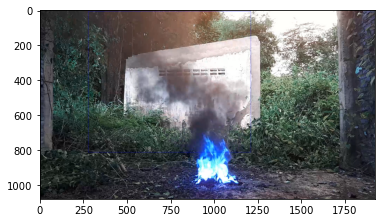

In [298]:
x, y, w, h = convert_box

l = int((x - w / 2) * dw)
r = int((x + w / 2) * dw)
t = int((y - h / 2) * dh)
b = int((y + h / 2) * dh)

if l < 0:
    l = 0
if r > dw - 1:
    r = dw - 1
if t < 0:
    t = 0
if b > dh - 1:
    b = dh - 1

print(l, t, r, b)
cv2.rectangle(sample_img, (l, r), (t, b), (0, 0, 255), 1)
plt.imshow(sample_img)
plt.show()

# 클래스 개수 세기(Train)

In [118]:
class_array = []
count = 0
for i in txt_dir:
    with open(i, "r") as f:
        txt_file = f.readlines()
        class_number = int(txt_file[0].split(" ")[0])
        class_array.append(class_number)
        count += 1
        print("{}번째 클래스 {}".format(count, class_number))

class_array[0:5]

1번째 클래스 3
2번째 클래스 0
3번째 클래스 3
4번째 클래스 0
5번째 클래스 0
6번째 클래스 0
7번째 클래스 0
8번째 클래스 0
9번째 클래스 0
10번째 클래스 3
11번째 클래스 0
12번째 클래스 0
13번째 클래스 3
14번째 클래스 4
15번째 클래스 3
16번째 클래스 3
17번째 클래스 3
18번째 클래스 3
19번째 클래스 3
20번째 클래스 3
21번째 클래스 3
22번째 클래스 3
23번째 클래스 3
24번째 클래스 3
25번째 클래스 3
26번째 클래스 3
27번째 클래스 3
28번째 클래스 3
29번째 클래스 3
30번째 클래스 3
31번째 클래스 3
32번째 클래스 3
33번째 클래스 3
34번째 클래스 3
35번째 클래스 3
36번째 클래스 3
37번째 클래스 3
38번째 클래스 3
39번째 클래스 3
40번째 클래스 3
41번째 클래스 3
42번째 클래스 3
43번째 클래스 3
44번째 클래스 3
45번째 클래스 3
46번째 클래스 3
47번째 클래스 3
48번째 클래스 3
49번째 클래스 3
50번째 클래스 3
51번째 클래스 3
52번째 클래스 3
53번째 클래스 3
54번째 클래스 3
55번째 클래스 3
56번째 클래스 3
57번째 클래스 3
58번째 클래스 3
59번째 클래스 3
60번째 클래스 3
61번째 클래스 3
62번째 클래스 3
63번째 클래스 3
64번째 클래스 3
65번째 클래스 3
66번째 클래스 3
67번째 클래스 3
68번째 클래스 3
69번째 클래스 3
70번째 클래스 0
71번째 클래스 3
72번째 클래스 3
73번째 클래스 3
74번째 클래스 3
75번째 클래스 3
76번째 클래스 3
77번째 클래스 3
78번째 클래스 3
79번째 클래스 3
80번째 클래스 3
81번째 클래스 3
82번째 클래스 0
83번째 클래스 3
84번째 클래스 0
85번째 클래스 3
86번째 클래스 3
87번째 클래스 3
88번째 클래스 3
89번째 클래스 3
90번째 클래스 0
91번째 클래스 0
92번째 클래스

743번째 클래스 1
744번째 클래스 1
745번째 클래스 1
746번째 클래스 1
747번째 클래스 1
748번째 클래스 1
749번째 클래스 1
750번째 클래스 1
751번째 클래스 1
752번째 클래스 1
753번째 클래스 0
754번째 클래스 1
755번째 클래스 1
756번째 클래스 1
757번째 클래스 1
758번째 클래스 1
759번째 클래스 1
760번째 클래스 1
761번째 클래스 1
762번째 클래스 1
763번째 클래스 1
764번째 클래스 1
765번째 클래스 1
766번째 클래스 1
767번째 클래스 1
768번째 클래스 1
769번째 클래스 1
770번째 클래스 1
771번째 클래스 1
772번째 클래스 1
773번째 클래스 1
774번째 클래스 1
775번째 클래스 1
776번째 클래스 1
777번째 클래스 3
778번째 클래스 1
779번째 클래스 1
780번째 클래스 1
781번째 클래스 1
782번째 클래스 1
783번째 클래스 1
784번째 클래스 1
785번째 클래스 1
786번째 클래스 1
787번째 클래스 1
788번째 클래스 1
789번째 클래스 1
790번째 클래스 1
791번째 클래스 1
792번째 클래스 1
793번째 클래스 1
794번째 클래스 1
795번째 클래스 1
796번째 클래스 1
797번째 클래스 1
798번째 클래스 1
799번째 클래스 1
800번째 클래스 1
801번째 클래스 1
802번째 클래스 1
803번째 클래스 1
804번째 클래스 1
805번째 클래스 1
806번째 클래스 1
807번째 클래스 1
808번째 클래스 1
809번째 클래스 1
810번째 클래스 1
811번째 클래스 1
812번째 클래스 1
813번째 클래스 1
814번째 클래스 1
815번째 클래스 1
816번째 클래스 1
817번째 클래스 1
818번째 클래스 1
819번째 클래스 1
820번째 클래스 1
821번째 클래스 1
822번째 클래스 1
823번째 클래스 1
824번째 클래스 1
825번째 클래스 1
826번

1434번째 클래스 9
1435번째 클래스 9
1436번째 클래스 9
1437번째 클래스 9
1438번째 클래스 9
1439번째 클래스 9
1440번째 클래스 9
1441번째 클래스 9
1442번째 클래스 9
1443번째 클래스 9
1444번째 클래스 9
1445번째 클래스 9
1446번째 클래스 9
1447번째 클래스 9
1448번째 클래스 9
1449번째 클래스 9
1450번째 클래스 9
1451번째 클래스 9
1452번째 클래스 9
1453번째 클래스 9
1454번째 클래스 9
1455번째 클래스 9
1456번째 클래스 9
1457번째 클래스 9
1458번째 클래스 9
1459번째 클래스 9
1460번째 클래스 9
1461번째 클래스 9
1462번째 클래스 9
1463번째 클래스 9
1464번째 클래스 9
1465번째 클래스 9
1466번째 클래스 9
1467번째 클래스 9
1468번째 클래스 9
1469번째 클래스 9
1470번째 클래스 9
1471번째 클래스 9
1472번째 클래스 9
1473번째 클래스 9
1474번째 클래스 9
1475번째 클래스 9
1476번째 클래스 9
1477번째 클래스 9
1478번째 클래스 9
1479번째 클래스 9
1480번째 클래스 9
1481번째 클래스 9
1482번째 클래스 9
1483번째 클래스 9
1484번째 클래스 9
1485번째 클래스 9
1486번째 클래스 9
1487번째 클래스 9
1488번째 클래스 9
1489번째 클래스 9
1490번째 클래스 9
1491번째 클래스 9
1492번째 클래스 9
1493번째 클래스 9
1494번째 클래스 9
1495번째 클래스 9
1496번째 클래스 9
1497번째 클래스 9
1498번째 클래스 9
1499번째 클래스 9
1500번째 클래스 9
1501번째 클래스 9
1502번째 클래스 9
1503번째 클래스 9
1504번째 클래스 9
1505번째 클래스 9
1506번째 클래스 9
1507번째 클래스 9
1508번째 클래스 9
1509번째 클래스 9
1510번째 클래스 9

[3, 0, 3, 0, 0]

In [119]:
from collections import Counter

cnt = Counter(class_array)
print("각 레이블 수: ", cnt)

각 레이블 수:  Counter({9: 1000, 3: 594, 1: 205, 2: 136, 0: 64, 4: 1})


In [120]:
val_txt_dir

['D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04586.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04591.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04641.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN04761.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05066.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05122.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05163.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05167.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0801MN05190.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN00827.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN00944.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN00984.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN01008.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN01024.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN01036.txt',
 'D:\\fire_datasets\\Validation\\labels\\S3-N0802MN0104

In [121]:
class_array = []
count = 0
for i in val_txt_dir:
    with open(i, "r") as f:
        txt_file = f.readlines()
        class_number = int(txt_file[0].split(" ")[0])
        class_array.append(class_number)
        count += 1
        print("{}번째 클래스 {}".format(count, class_number))

class_array[0:5]

1번째 클래스 9
2번째 클래스 9
3번째 클래스 9
4번째 클래스 9
5번째 클래스 9
6번째 클래스 9
7번째 클래스 9
8번째 클래스 9
9번째 클래스 9
10번째 클래스 9
11번째 클래스 9
12번째 클래스 9
13번째 클래스 9
14번째 클래스 9
15번째 클래스 9
16번째 클래스 9
17번째 클래스 9
18번째 클래스 9
19번째 클래스 9
20번째 클래스 9
21번째 클래스 9
22번째 클래스 9
23번째 클래스 9
24번째 클래스 9
25번째 클래스 9
26번째 클래스 9
27번째 클래스 9
28번째 클래스 9
29번째 클래스 9
30번째 클래스 9
31번째 클래스 9
32번째 클래스 9
33번째 클래스 9
34번째 클래스 9
35번째 클래스 9
36번째 클래스 9
37번째 클래스 9
38번째 클래스 9
39번째 클래스 9
40번째 클래스 9
41번째 클래스 9
42번째 클래스 9
43번째 클래스 9
44번째 클래스 9
45번째 클래스 9
46번째 클래스 9
47번째 클래스 9
48번째 클래스 9
49번째 클래스 9
50번째 클래스 9
51번째 클래스 9
52번째 클래스 9
53번째 클래스 9
54번째 클래스 9
55번째 클래스 9
56번째 클래스 9
57번째 클래스 9
58번째 클래스 9
59번째 클래스 9
60번째 클래스 9
61번째 클래스 9
62번째 클래스 9
63번째 클래스 9
64번째 클래스 9
65번째 클래스 9
66번째 클래스 9
67번째 클래스 9
68번째 클래스 9
69번째 클래스 9
70번째 클래스 9
71번째 클래스 9
72번째 클래스 9
73번째 클래스 9
74번째 클래스 9
75번째 클래스 9
76번째 클래스 9
77번째 클래스 9
78번째 클래스 9
79번째 클래스 9
80번째 클래스 9
81번째 클래스 9
82번째 클래스 9
83번째 클래스 9
84번째 클래스 9
85번째 클래스 9
86번째 클래스 9
87번째 클래스 9
88번째 클래스 9
89번째 클래스 9
90번째 클래스 9
91번째 클래스 9
92번째 클래스

753번째 클래스 1
754번째 클래스 1
755번째 클래스 1
756번째 클래스 1
757번째 클래스 1
758번째 클래스 1
759번째 클래스 1
760번째 클래스 1
761번째 클래스 3
762번째 클래스 1
763번째 클래스 1
764번째 클래스 1
765번째 클래스 1
766번째 클래스 1
767번째 클래스 1
768번째 클래스 1
769번째 클래스 1
770번째 클래스 1
771번째 클래스 1
772번째 클래스 1
773번째 클래스 1
774번째 클래스 1
775번째 클래스 1
776번째 클래스 1
777번째 클래스 1
778번째 클래스 1
779번째 클래스 1
780번째 클래스 1
781번째 클래스 3
782번째 클래스 1
783번째 클래스 3
784번째 클래스 1
785번째 클래스 3
786번째 클래스 3
787번째 클래스 1
788번째 클래스 1
789번째 클래스 3
790번째 클래스 2
791번째 클래스 2
792번째 클래스 2
793번째 클래스 2
794번째 클래스 2
795번째 클래스 2
796번째 클래스 2
797번째 클래스 2
798번째 클래스 2
799번째 클래스 2
800번째 클래스 2
801번째 클래스 2
802번째 클래스 2
803번째 클래스 2
804번째 클래스 2
805번째 클래스 2
806번째 클래스 2
807번째 클래스 2
808번째 클래스 2
809번째 클래스 2
810번째 클래스 2
811번째 클래스 2
812번째 클래스 2
813번째 클래스 2
814번째 클래스 2
815번째 클래스 2
816번째 클래스 2
817번째 클래스 2
818번째 클래스 2
819번째 클래스 2
820번째 클래스 2
821번째 클래스 2
822번째 클래스 2
823번째 클래스 2
824번째 클래스 2
825번째 클래스 2
826번째 클래스 2
827번째 클래스 2
828번째 클래스 2
829번째 클래스 2
830번째 클래스 2
831번째 클래스 2
832번째 클래스 2
833번째 클래스 2
834번째 클래스 2
835번째 클래스 2
836번

1485번째 클래스 9
1486번째 클래스 9
1487번째 클래스 9
1488번째 클래스 9
1489번째 클래스 9
1490번째 클래스 9
1491번째 클래스 9
1492번째 클래스 9
1493번째 클래스 9
1494번째 클래스 9
1495번째 클래스 9
1496번째 클래스 9
1497번째 클래스 9
1498번째 클래스 9
1499번째 클래스 9
1500번째 클래스 9
1501번째 클래스 9
1502번째 클래스 9
1503번째 클래스 9
1504번째 클래스 9
1505번째 클래스 9
1506번째 클래스 9
1507번째 클래스 9
1508번째 클래스 9
1509번째 클래스 9
1510번째 클래스 9
1511번째 클래스 9
1512번째 클래스 9
1513번째 클래스 9
1514번째 클래스 9
1515번째 클래스 9
1516번째 클래스 9
1517번째 클래스 9
1518번째 클래스 9
1519번째 클래스 9
1520번째 클래스 9
1521번째 클래스 9
1522번째 클래스 9
1523번째 클래스 9
1524번째 클래스 9
1525번째 클래스 9
1526번째 클래스 9
1527번째 클래스 9
1528번째 클래스 9
1529번째 클래스 9
1530번째 클래스 9
1531번째 클래스 9
1532번째 클래스 9
1533번째 클래스 9
1534번째 클래스 9
1535번째 클래스 9
1536번째 클래스 9
1537번째 클래스 9
1538번째 클래스 9
1539번째 클래스 9
1540번째 클래스 9
1541번째 클래스 9
1542번째 클래스 9
1543번째 클래스 9
1544번째 클래스 9
1545번째 클래스 9
1546번째 클래스 9
1547번째 클래스 9
1548번째 클래스 9
1549번째 클래스 9
1550번째 클래스 9
1551번째 클래스 9
1552번째 클래스 9
1553번째 클래스 9
1554번째 클래스 9
1555번째 클래스 9
1556번째 클래스 9
1557번째 클래스 9
1558번째 클래스 9
1559번째 클래스 9
1560번째 클래스 9
1561번째 클래스 9

[9, 9, 9, 9, 9]

In [122]:
from collections import Counter

cnt = Counter(class_array)
print("각 레이블 수: ", cnt)

각 레이블 수:  Counter({9: 1000, 2: 546, 1: 260, 3: 194})
